In [2]:
import sqlite3
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# create a connection to local db file

In [4]:
db_conn = sqlite3.connect("league.db")

In [5]:
# simple test: how many champions in total

In [6]:
sql = "SELECT COUNT(championName) as total_champions FROM Champions"
pd.read_sql(sql, con = db_conn)

,total_champions
0,161


In [7]:
# total matches, # of games that red/blue team win

In [8]:
sql2 = "SELECT COUNT(matchId) as total_games, SUM(winner = 100) AS blue_team_win, SUM(winner = 200) AS red_team_win FROM Matches"
df = pd.read_sql(sql2 ,con = db_conn)
df = pd.melt(df)
print(df)

        variable  value
0    total_games  43995
1  blue_team_win  22030
2   red_team_win  21965


Text(0, 0.5, 'Numbers of Game Each Team Won')

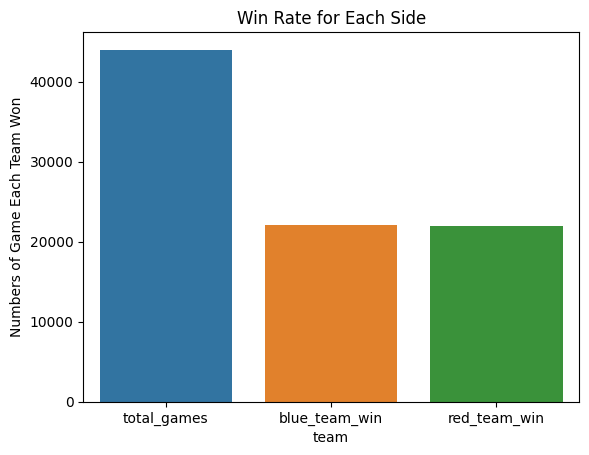

In [9]:
ax = sns.barplot(x = 'variable', y= 'value', data=df)
plt.title("Win Rate for Each Side")
plt.xlabel("team")
plt.ylabel("Numbers of Game Each Team Won")

In [43]:
# win rate for each champoin
sql3 = ("SELECT ch.championName, COUNT(m.winner) as games_won_by_champ FROM Champions as ch JOIN Participants as p on ch.championId = p.championId JOIN Matches as m on p.matchId = m.matchId WHERE m.winner = p.teamId GROUP BY ch.championName ORDER BY championName ASC")
df1 = pd.read_sql(sql3, con = db_conn)
# print(df)
sql4 = "select Champions.championName, count(*) as total from Participants join Champions on Participants.championId == Champions.championId join Matches on Matches.matchId == Participants.matchId group by championName Order BY championName"
df2 = pd.read_sql(sql4, con = db_conn)
# print(df2)
dataframe = pd.DataFrame().assign(ChampionName=df1['championName'], gamesWon=df1['games_won_by_champ'], total=df2['total'])
dataframe['percentage'] = np.nan
dataframe['percentage'] = dataframe['gamesWon']/dataframe['total'] * 100
dataframe['percentage'] = dataframe['percentage'].apply(lambda x: round(x, 2))
dataframe


,ChampionName,gamesWon,total,percentage
0,Aatrox,2491,4924,50.59
1,Ahri,1383,2843,48.65
2,Akali,2590,5410,47.87
3,Akshan,820,1694,48.41
4,Alistar,567,1135,49.96
...,...,...,...,...
156,Zeri,415,942,44.06
157,Ziggs,869,1629,53.35
158,Zilean,910,1735,52.45
159,Zoe,625,1265,49.41


  ChampionName  gamesWon  total  percentage
0       Illaoi      1033   1904       54.25
1         Rell       468    870       53.79
2        Swain      2019   3758       53.73
3        Amumu      2108   3936       53.56
4        Ziggs       869   1629       53.35
5      Shyvana       810   1523       53.18
6  Mordekaiser      2501   4744       52.72
7         Zyra      1358   2576       52.72
8        Nilah       911   1729       52.69
9        Neeko       980   1865       52.55


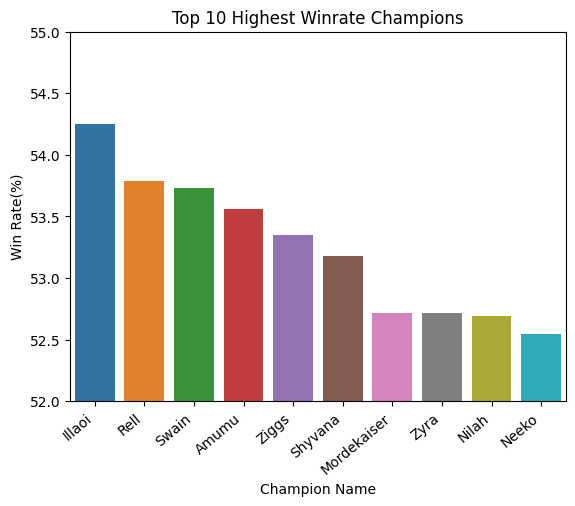

In [62]:
dataframe = dataframe.sort_values(['percentage'], ascending = False).reset_index(drop=True)
top10 = dataframe
top10 = top10.head(10)
ax = sns.barplot(x = 'ChampionName', y= 'percentage', data=top10)
ax.set_ylim(52, 55)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_title("Top 10 Highest Winrate Champions")
ax.set_ylabel("Win Rate(%)")
ax.set_xlabel("Champion Name")
print(top10)

In [61]:
# These are top 10 win rate chaimpions, if we want to win the game, probably we want to choose from them.

    ChampionName  gamesWon  total  percentage
151      Leblanc       898   1936       46.38
152      Orianna       542   1174       46.17
153  AurelionSol       120    260       46.15
154     Aphelios      1486   3275       45.37
155        Ivern       276    612       45.10
156         Ryze       656   1455       45.09
157         Azir       849   1893       44.85
158  TwistedFate       461   1033       44.63
159         Zeri       415    942       44.06
160      Nidalee       517   1192       43.37


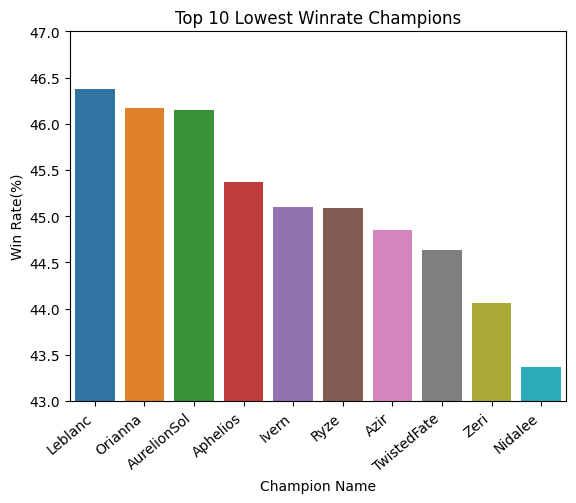

In [63]:
low10 = dataframe
low10 = low10.tail(10)
ax = sns.barplot(x = 'ChampionName', y= 'percentage', data=low10)
ax.set_ylim(43, 47)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_title("Top 10 Lowest Winrate Champions")
ax.set_ylabel("Win Rate(%)")
ax.set_xlabel("Champion Name")
print(low10)

In [ ]:
# These are lowest win rate champions, if we want to win the game, don't choose from them, they are trash.